In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import unicodedata
import re

import os
import acquire
import prepare

import time

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')

# Scrape

Here I will be writing the code to scrape github repository links

In [3]:
link = 'https://github.com/search?p=1&q=bot&type=Repositories'

# make the request using the link of the first article and save html response to a variable
response = requests.get(link, headers={'user-agent': 'codeup data science hopper cohort'})
html = response.text
html

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-dkuYFW+ra8yYSt342e5pJEeslPSjMcrMvNxlYZMyM/X+/WJHDPvoCuGq3LFojI7B0dQWwZNRiPMnbi9IfUgTaA==" rel="stylesheet" href="https://github.githubassets.com/assets/light-764b98156fab6bcc984addf8d9ee6924.css" /><link crossorigin="anonymous" media="all" integrity="sha512-UrAu23+eyncWvaQFwsLbgSKtmLb2aH1bcT4hJnnRdkaPuY1eu9bumt33FyHHFDX8hskTUNWNkIsMCz7F

In [4]:
# # create soup object
soup = BeautifulSoup(html)
print(soup.prettify())

<!DOCTYPE html>
<html data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="https://github.githubassets.com" rel="dns-prefetch"/>
  <link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
  <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
  <link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
  <link href="https://avatars.githubusercontent.com" rel="preconnect"/>
  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-764b98156fab6bcc984addf8d9ee6924.css" integrity="sha512-dkuYFW+ra8yYSt342e5pJEeslPSjMcrMvNxlYZMyM/X+/WJHDPvoCuGq3LFojI7B0dQWwZNRiPMnbi9IfUgTaA==" media="all" rel="stylesheet"/>
  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-52b02edb7f9eca7716bda405c2c2db81.css" integrity="sha512-UrAu23+eyncWvaQF

In [5]:
# # select items that fall under tag 'a', class 'v-align-middle'
repos = soup.select('a.v-align-middle')
repos

[<a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"bot","result_position":1,"click_id":120088519,"result":{"id":120088519,"global_relay_id":"MDEwOlJlcG9zaXRvcnkxMjAwODg1MTk=","model_name":"Repository","url":"https://github.com/python-discord/bot"},"originating_url":"https://github.com/search?p=1&amp;q=bot&amp;type=Repositories","user_id":null}}' data-hydro-click-hmac="9eb4ff487947e2b2db2ce998a713bd4493b67b0288b3e4dfc81cbb32100f8370" href="/python-discord/bot">python-discord/<em>bot</em></a>,
 <a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"bot","result_position":2,"click_id":184820025,"result":{"id":184820025,"global_relay_id":"MDEwOlJlcG9zaXRvcnkxODQ4MjAwMjU=","model_name":"Repository","url":"https://github.com/discord-tickets/bot"},"originating_url":"https://github.com/search?p=1&amp;q=bot&amp;type=Repositories","user_id":nu

In [6]:
# # get links within those items that are assigned tothe attribute 'href'
repos = [repo['href'] for repo in repos]
repos

['/python-discord/bot',
 '/discord-tickets/bot',
 '/go-chat-bot/bot',
 '/SuMaiKaDe/bot',
 '/microsoft/BotBuilder-Samples',
 '/GAwesomeBot/bot',
 '/roughike/BottomBar',
 '/mithun-prasad/Bot',
 '/boto/boto3',
 '/thinkpixellab/bot']

In [7]:
# commenting out this cell as it takes a while to run and I now have the csv saved locally

# use collector and for loop to gather github links, pausing every 5 for 60 seconds to prevent github excessive collection limitations 

# collector = []

# for i in range(31,61):
#     link = 'https://github.com/search?p={}&q=bot&type=Repositories'
#     response = requests.get(link.format(i), headers={'user-agent': 'codeup data science hopper cohort'})
#     print(response.status_code)
#     html = response.text
#     soup = BeautifulSoup(html)
#     repos = soup.select('a.v-align-middle')
#     repo_links = [repo['href'] for repo in repos]
#     collector += repo_links
#     print(collector[-1])

#     if i % 5 == 0:
#         time.sleep(60)
        
# collector

In [8]:
# # check length of collector
# len(collector)

In [9]:
# # use another for loop to remove the forward slash at the beginning of the links
# accumulator = []
# for item in collector:
#     accumulator.append(item[1:])
# accumulator

In [10]:
# # check if there are any duplicates by converting to set and checking the length
# len(set(accumulator))

# Acquire

Pull in data that was cleaned, prepped, and saved to csv by a teammate

In [11]:
# pull in data
df = pd.read_csv('NLP.csv')
df.drop(columns = 'Unnamed: 0', inplace=True)
df

,repo,language,readme_contents,clean,stemmed,lemmatized
0,python-discord/bot,Python,# Python Utility Bot\n\n[![Discord][7]][8]\n[!...,python utility bot discord78 lint test12 build...,python util bot discord78 lint test12 build34 ...,python util bot discord78 lint test12 build34 ...
1,microsoft/BotBuilder-Samples,JavaScript,\r\n# ![Bot Framework Samples](./docs/media/Bo...,bot framework samplesdocsmediabotframeworksamp...,bot framework samplesdocsmediabotframeworksamp...,bot framework samplesdocsmediabotframeworksamp...
2,GAwesomeBot/bot,JavaScript,# GAwesomeBot\n[![Travis Status](https://travi...,gawesomebot travis statushttpstravisciorggilbe...,gawesomebot travi statushttpstravisciorggilber...,gawesomebot travi statushttpstravisciorggilber...
3,roughike/BottomBar,Java,# BottomBar (Deprecated)\n\nI don't have time ...,bottombar deprecated dont time maintain anymor...,bottombar deprec dont time maintain anymor bas...,bottombar deprec dont time maintain anymor bas...
4,mithun-prasad/Bot,C#,# Developing and Deploying Intelligent Chat Bo...,developing deploying intelligent chat bots tra...,develop deploy intellig chat bot train resourc...,develop deploy intellig chat bot train resourc...
...,...,...,...,...,...,...
223,rougeth/bottery,Python,# bottery\n:battery: A framework for building ...,bottery battery framework building bots build ...,botteri batteri framework build bot build stat...,botteri batteri framework build bot build stat...
224,microsoft/BotBuilder-V3,C#,# V3 Deprecation Notification\n\nMicrosoft Bot...,v3 deprecation notification microsoft bot fram...,v3 deprec notif microsoft bot framework sdk v4...,v3 deprec notif microsoft bot framework sdk v4...
225,2018kguo/RobinhoodBot,Python,# RobinhoodBot\nTrading bot for Robinhood acco...,robinhoodbot trading bot robinhood accounts in...,robinhoodbot trade bot robinhood account info ...,robinhoodbot trade bot robinhood account info ...
226,howdyai/botkit-starter-slack,JavaScript,# This repo is deprecated!\n\nTo get a fresh B...,repo deprecated get fresh botkit starter kit u...,repo deprec get fresh botkit starter kit use y...,repo deprec get fresh botkit starter kit use y...


# Split

Use a function split data into three data sets before exploring

In [12]:
# use function to split data into train, validate, and test
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

((127, 6), (55, 6), (46, 6))

# Explore

I will be looking into bigrams and trigrams of the lemmatized readme content by programming language to see if there are any differences/commonalities and determine if those can be used to predict the programming language base on readme content.

In [13]:
# check data
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
222,botgram/botgram,JavaScript,[![Botgram](./docs/splash.png)](https://botgra...,botgramdocssplashpnghttpsbotgramjsorg bots spe...,botgramdocssplashpnghttpsbotgramjsorg bot spec...,botgramdocssplashpnghttpsbotgramjsorg bot spec...
97,odysseusmax/animated-lamp,Python,# [Screenshotit_bot](https://tx.me/screenshoti...,screenshotit_bothttpstxmescreenshotit_bot tele...,screenshotit_bothttpstxmescreenshotit_bot tele...,screenshotit_bothttpstxmescreenshotit_bot tele...
182,agermanidis/SnapchatBot,Python,<h1 style='color: red'>This repo is deprecated...,h1 stylecolor redthis repo deprecated due chan...,h1 stylecolor redthi repo deprec due chang sna...,h1 stylecolor redthi repo deprec due chang sna...
108,NotSoSuper/NotSoBot,Python,# NotSoBot\n### Requires:\n- Python 3.5\n- [di...,notsobot requires python 35 discordpyhttpsgith...,notsobot requir python 35 discordpyhttpsgithub...,notsobot requir python 35 discordpyhttpsgithub...
176,boto/boto3-sample,Python,=========================\nBoto 3 Sample Appli...,boto 3 sample application application implemen...,boto 3 sampl applic applic implement drop vide...,boto 3 sampl applic applic implement drop vide...


In [14]:
# check the language value counts
train.language.value_counts()

Python        64
JavaScript    26
C#            13
Java          13
TypeScript    11
Name: language, dtype: int64

In [15]:
# combine all lemmatized words by language
python_words = ' '.join(train.lemmatized[train.language == 'Python'].astype(str))
javascript_words = ' '.join(train.lemmatized[train.language == 'JavaScript'].astype(str))
c_words = ' '.join(train.lemmatized[train.language == 'C#'].astype(str))
java_words = ' '.join(train.lemmatized[train.language == 'Java'].astype(str))
typescript_words = ' '.join(train.lemmatized[train.language == 'TypeScript'].astype(str))

In [16]:
# use ngrams to make a list of bigrams by language
top20_python_bigrams = pd.Series(nltk.ngrams(python_words.split(), 2)).value_counts().head(20)
top20_javascript_bigrams = pd.Series(nltk.ngrams(javascript_words.split(), 2)).value_counts().head(20)
top20_c_bigrams = pd.Series(nltk.ngrams(c_words.split(), 2)).value_counts().head(20)
top20_java_bigrams = pd.Series(nltk.ngrams(java_words.split(), 2)).value_counts().head(20)
top20_typescript_bigrams = pd.Series(nltk.ngrams(typescript_words.split(), 2)).value_counts().head(20)

In [59]:
df = pd.DataFrame(top20_python_bigrams).reset_index().rename(columns={'index':'python_bigrams', 0:'p_count'})
df.head()

,python_bigrams,p_count
0,"(pip, instal)",61
1,"(python, 3)",45
2,"(servic, account)",44
3,"(instal, r)",29
4,"(r, requirementstxt)",25


In [64]:
x = pd.concat(df, pd.DataFrame(top20_javascript_bigrams))
x

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

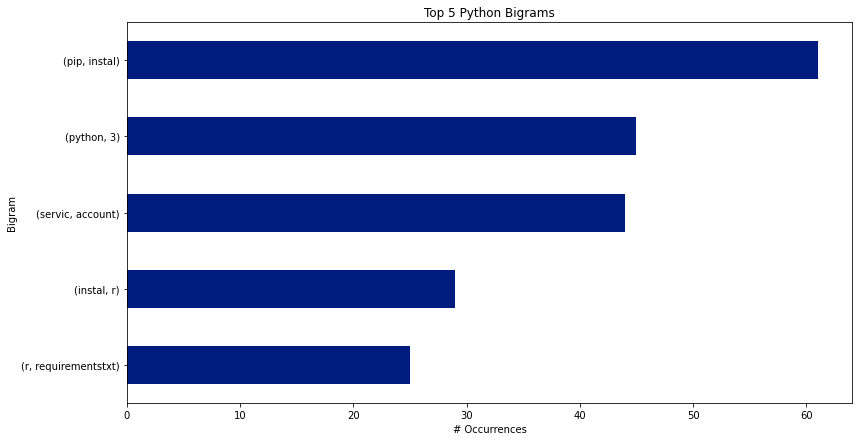

In [34]:
# plot out top 5 python bigrams
top20_python_bigrams.head().sort_values().plot.barh()

plt.title('Top 5 Python Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()

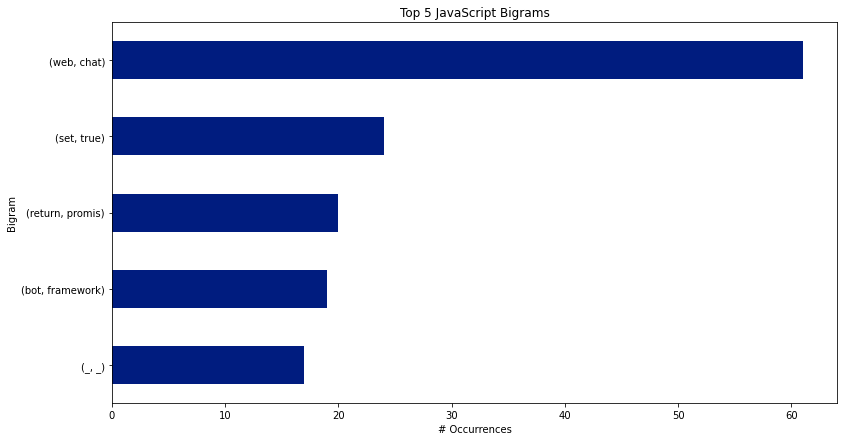

In [39]:
# plot out top 5 javascript bigrams
top20_javascript_bigrams.head().sort_values().plot.barh()

plt.title('Top 5 JavaScript Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()

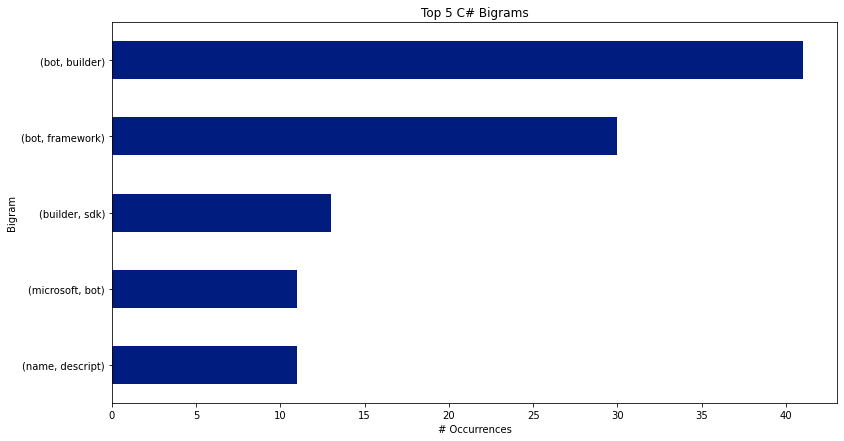

In [42]:
# plot out top 5 C# bigrams
top20_c_bigrams.head().sort_values().plot.barh()

plt.title('Top 5 C# Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()

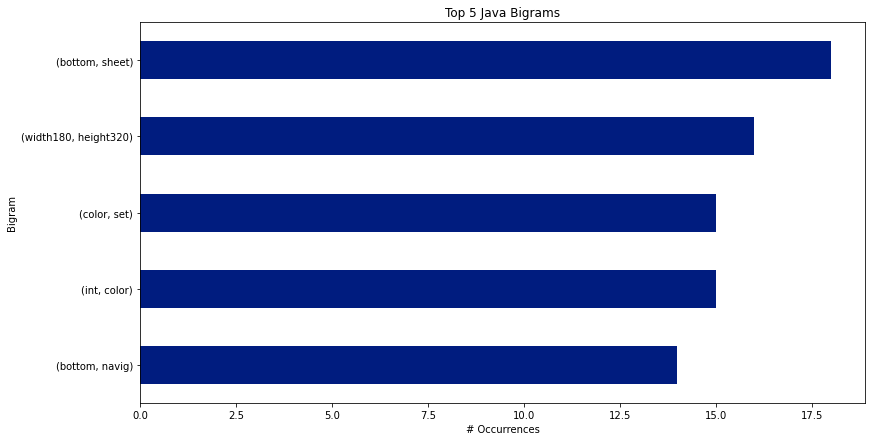

In [44]:
# plot out top 5 java bigrams
top20_java_bigrams.head().sort_values().plot.barh()

plt.title('Top 5 Java Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()

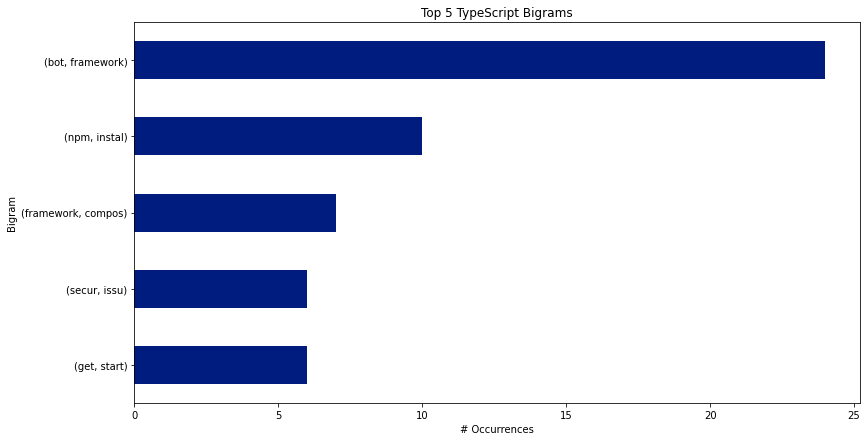

In [45]:
# plot out top 5 typescript bigrams
top20_typescript_bigrams.head().sort_values().plot.barh()

plt.title('Top 5 TypeScript Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()